In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch import nn

In [236]:
from sklearn.datasets import make_moons

In [237]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=2)

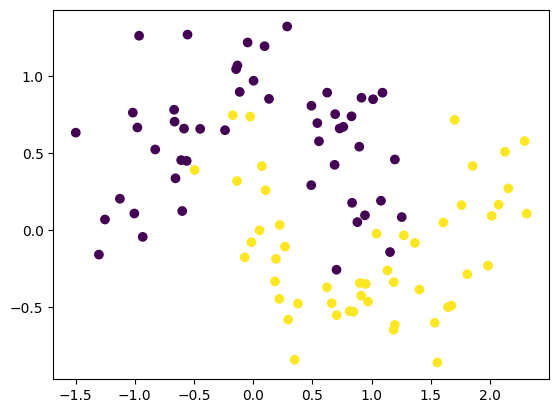

In [238]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [239]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [240]:
class yuhi(nn.Module):
    def __init__(self, input = 2, features = 128 , num_class = 1):
        super().__init__()
        self.linear_layer = nn.Sequential(
            nn.Linear(in_features=input, out_features=features),
            nn.ReLU(),
            nn.Linear(in_features=features, out_features=features),
            nn.ReLU(),
            nn.Linear(in_features=features, out_features=num_class),
            nn.Sigmoid()
        )       

    def forward(self, x):
        return self.linear_layer(x)

model = yuhi().to(device)

In [241]:
model

yuhi(
  (linear_layer): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [242]:
total_params = sum(
	param.numel() for param in model.parameters()
)
total_params

17025

In [243]:
# loss and optimizer
loss_fc = nn.BCELoss()

optimizer = torch.optim.Adam(params = model.parameters(),
                            lr = 0.01)

In [244]:
# turning data into tensors
X_ten = torch.from_numpy(X).type(torch.float)
y_ten = torch.from_numpy(y).type(torch.float)

In [245]:
epochs = 2000

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  model.train()

  # forward pass
  y_logits = model(X_ten).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate the loss/accuarcy
  loss = loss_fc(y_logits, y_ten)

  # optimizer zero grad
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # optimizer step (perform gradient descent)
  optimizer.step()

  # testing
  model.eval()
  with torch.inference_mode():

    # forward pass
    test_logits = model(X_ten).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate the loss/accuarcy
    test_loss = loss_fc(test_logits, y_ten)


# lets print out what is happening
    if epoch % 100 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | Loss: {loss} | Validation Loss = {test_loss.item()}")

Epoch: 0 | Loss: 0.6683358550071716 | Validation Loss = 0.5057613849639893
Epoch: 100 | Loss: 0.05984998866915703 | Validation Loss = 0.059749484062194824
Epoch: 200 | Loss: 0.03438279777765274 | Validation Loss = 0.03393635153770447
Epoch: 300 | Loss: 0.005314666777849197 | Validation Loss = 0.00524591188877821
Epoch: 400 | Loss: 0.0012965287314727902 | Validation Loss = 0.0012857341207563877
Epoch: 500 | Loss: 0.0005885522114112973 | Validation Loss = 0.0005849924054928124
Epoch: 600 | Loss: 0.0003395802923478186 | Validation Loss = 0.0003380320849828422
Epoch: 700 | Loss: 0.0002225063944933936 | Validation Loss = 0.00022155058104544878
Epoch: 800 | Loss: 0.00015763538249302655 | Validation Loss = 0.0001572425535414368
Epoch: 900 | Loss: 0.00011759172048186883 | Validation Loss = 0.00011737069144146517
Epoch: 1000 | Loss: 9.129830868914723e-05 | Validation Loss = 9.096477151615545e-05
Epoch: 1100 | Loss: 7.296823605429381e-05 | Validation Loss = 7.278838893398643e-05
Epoch: 1200 | Lo

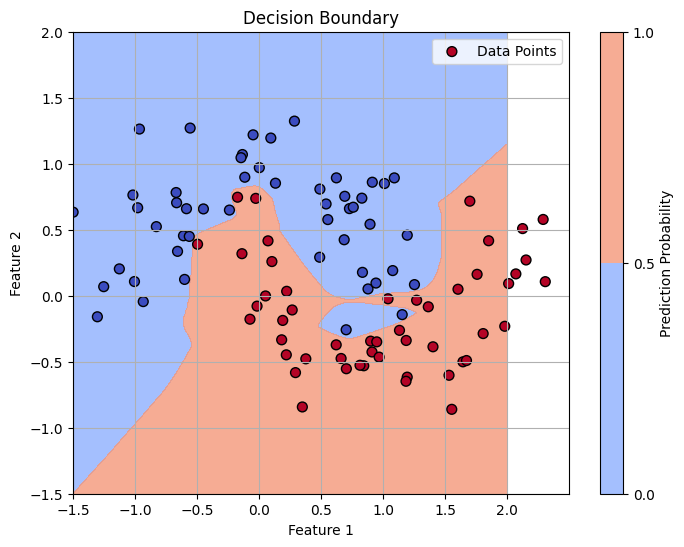

In [246]:
# 1. Generate a grid of points
x1_range = np.linspace(-1.5, 2, 200)
x2_range = np.linspace(-1.5, 2, 200)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]
grid_tensor = torch.tensor(grid, dtype=torch.float32)

# 2. Predict probabilities for the grid points
with torch.no_grad():
    grid_preds = model(grid_tensor).numpy()

# 3. Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(x1_grid, x2_grid, grid_preds.reshape(x1_grid.shape), levels=[0, 0.5, 1], alpha=0.8, cmap='coolwarm')
plt.colorbar(label='Prediction Probability')

# 4. Overlay the data points
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolor='k', cmap='coolwarm', s=50, label='Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.legend()
plt.grid()
plt.show()

In [247]:
# As we can see that our model is overfitting

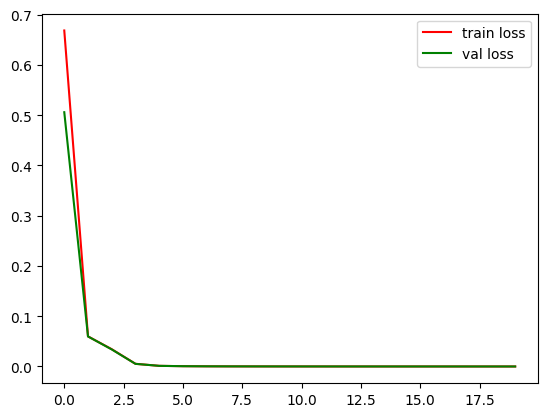

In [248]:
plt.plot(train_loss_values, c="red", label="train loss")
plt.plot(test_loss_values, c="green", label="val loss")
plt.legend()
plt.show()

# Model 2 with Regularization

In [249]:
class Regu_NN(nn.Module):
    def __init__(self, input = 2, features = 128 , num_class = 1):
        super().__init__()
        self.linear_layer = nn.Sequential(
            nn.Linear(in_features=input, out_features=features),
            nn.ReLU(),
            nn.Linear(in_features=features, out_features=features),
            nn.ReLU(),
            nn.Linear(in_features=features, out_features=num_class),
            nn.Sigmoid()
        )       

    def forward(self, x):
        return self.linear_layer(x)

model2 = Regu_NN().to(device)

In [250]:
model2

Regu_NN(
  (linear_layer): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [251]:
# loss and optimizer
loss_fc = nn.BCELoss()

optimizer = torch.optim.SGD(params = model2.parameters(),
                            lr = 0.05, weight_decay=1e-5)

In [252]:
epochs = 2000

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  model2.train()

  # forward pass
  y_logits = model2(X_ten).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate the loss/accuarcy
  loss = loss_fc(y_logits, y_ten)

  # optimizer zero grad
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # optimizer step (perform gradient descent)
  optimizer.step()

  # testing
  model2.eval()
  with torch.inference_mode():

    # forward pass
    test_logits = model2(X_ten).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate the loss/accuarcy
    test_loss = loss_fc(test_logits, y_ten)


# lets print out what is happening
    if epoch % 5 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | Loss: {loss} | Validation Loss = {test_loss.item()}")

Epoch: 0 | Loss: 0.6780804395675659 | Validation Loss = 0.6671106219291687
Epoch: 5 | Loss: 0.6278078556060791 | Validation Loss = 0.6188593506813049
Epoch: 10 | Loss: 0.5857478976249695 | Validation Loss = 0.5779783725738525
Epoch: 15 | Loss: 0.5489881634712219 | Validation Loss = 0.54222571849823
Epoch: 20 | Loss: 0.5171196460723877 | Validation Loss = 0.5113144516944885
Epoch: 25 | Loss: 0.48994162678718567 | Validation Loss = 0.4850558340549469
Epoch: 30 | Loss: 0.46725523471832275 | Validation Loss = 0.46323543787002563
Epoch: 35 | Loss: 0.4487627148628235 | Validation Loss = 0.4455130696296692
Epoch: 40 | Loss: 0.4338129460811615 | Validation Loss = 0.4311777353286743
Epoch: 45 | Loss: 0.42162269353866577 | Validation Loss = 0.4194512963294983
Epoch: 50 | Loss: 0.41156357526779175 | Validation Loss = 0.40976986289024353
Epoch: 55 | Loss: 0.40316927433013916 | Validation Loss = 0.401641845703125
Epoch: 60 | Loss: 0.39593052864074707 | Validation Loss = 0.39459294080734253
Epoch: 6

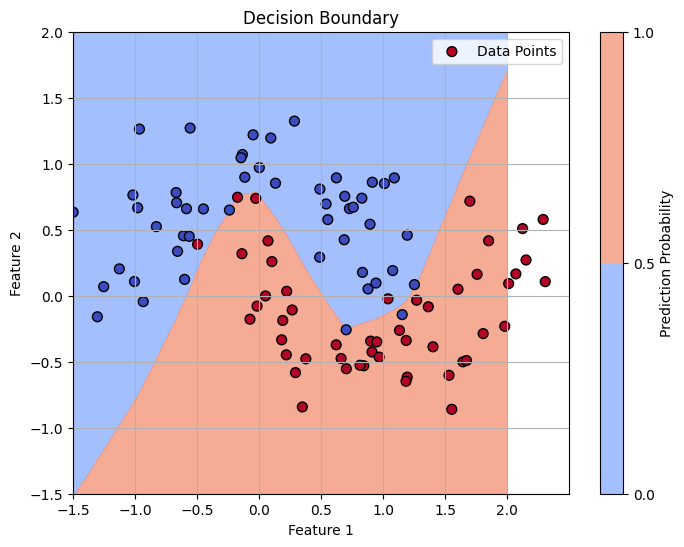

In [253]:
# 1. Generate a grid of points
x1_range = np.linspace(-1.5, 2, 200)
x2_range = np.linspace(-1.5, 2, 200)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]
grid_tensor = torch.tensor(grid, dtype=torch.float32)

# 2. Predict probabilities for the grid points
with torch.no_grad():
    grid_preds = model2(grid_tensor).numpy()

# 3. Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(x1_grid, x2_grid, grid_preds.reshape(x1_grid.shape), levels=[0, 0.5, 1], alpha=0.8, cmap='coolwarm')
plt.colorbar(label='Prediction Probability')

# 4. Overlay the data points
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolor='k', cmap='coolwarm', s=50, label='Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')
plt.legend()
plt.grid()
plt.show()

In [254]:
# As we can see from above the overfitting reduced

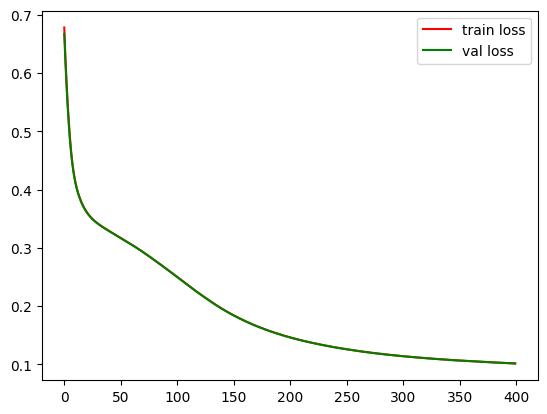

In [255]:
plt.plot(train_loss_values, c="red", label="train loss")
plt.plot(test_loss_values, c="green", label="val loss")
plt.legend()
plt.show()

In [260]:
model.state_dict()["linear_layer.0.weight"].shape

torch.Size([128, 2])

In [263]:
model1_weights = model.state_dict()["linear_layer.0.weight"].reshape(256)
model2_weights = model2.state_dict()["linear_layer.0.weight"].reshape(256)

C:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


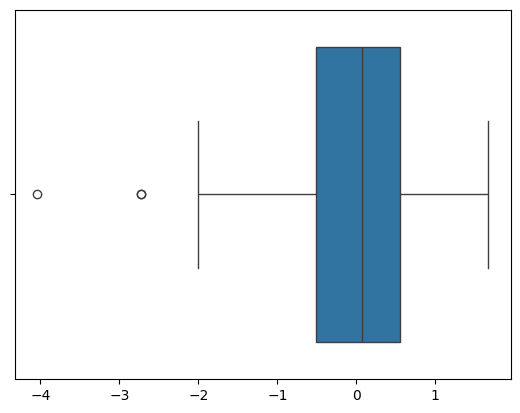

In [269]:
sns.boxplot(model1_weights, orient='h')
plt.show()

C:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


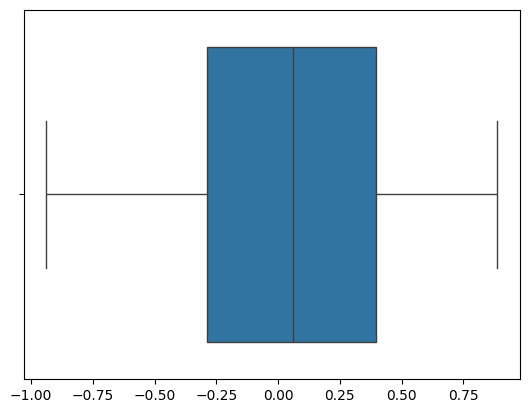

In [270]:
sns.boxplot(model2_weights, orient='h')
plt.show()

In [272]:
model1_weights.max(), model1_weights.min()

(tensor(1.6710), tensor(-4.0366))

In [274]:
model2_weights.max(), model2_weights.min()

(tensor(0.8867), tensor(-0.9394))

C:\Users\kumar\AppData\Local\Temp\ipykernel_26300\386678842.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weights, color="red", kde=False)
C:\Users\kumar\AppData\Local\Temp\ipykernel_26300\386678842.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weights, hist=Fa

<Axes: ylabel='Density'>

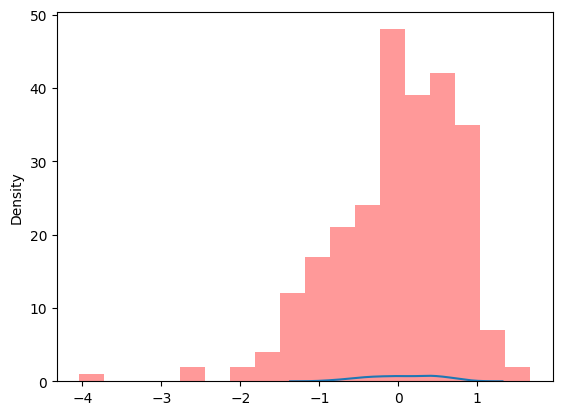

In [280]:
sns.distplot(model1_weights, color="red", hist=)
sns.distplot(model2_weights, hist=False, )